In [1]:
mela = readRDS('C:/Users/xiao/Documents/Dataset.RData')

In [2]:
data=mela[,c(4:7,9:33)]
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	240 obs. of  29 variables:
 $ gender            : chr  "female" "female" "male" "female" ...
 $ age               : num  46 74 56 71 80 36 84 63 81 65 ...
 $ tile_count        : num  165 224 132 486 76 272 555 92 404 126 ...
 $ infiltration_count: num  146 163 112 333 64 149 448 89 313 102 ...
 $ AKT1              : num  0.976 -0.119 0.115 0.694 -1.513 ...
 $ AKT3              : num  -0.783 0.287 -1.133 0.773 -0.741 ...
 $ DCK               : num  -1.433 0.185 -0.813 -0.372 -0.102 ...
 $ INSR              : num  0.401 -1.376 -0.405 -1.481 -0.932 ...
 $ MC1R              : num  -0.2041 0.1725 -0.0494 1.4269 -0.6001 ...
 $ PAK2              : num  0.0711 0.3565 -0.4629 0.355 1.534 ...
 $ TLR4              : num  0.1403 -0.9031 -0.0213 -0.9114 -0.6317 ...
 $ CIITA             : num  -0.7188 -0.7002 -0.0802 -0.6543 0.5589 ...
 $ IL17RB            : num  -0.157 0.0535 -0.4855 -0.4588 0.0207 ...
 $ KLRD1             : num  -0.635 -0.633 2.015 -0.483 

In [4]:
library(ggplot2)
library(MASS)

In [5]:
data$infil_rate = data$infiltration_count/data$tile_count

### EDA

In [6]:
str(data)

tibble [240 x 30] (S3: tbl_df/tbl/data.frame)
 $ gender            : chr [1:240] "female" "female" "male" "female" ...
 $ age               : num [1:240] 46 74 56 71 80 36 84 63 81 65 ...
 $ tile_count        : num [1:240] 165 224 132 486 76 272 555 92 404 126 ...
 $ infiltration_count: num [1:240] 146 163 112 333 64 149 448 89 313 102 ...
 $ AKT1              : num [1:240] 0.976 -0.119 0.115 0.694 -1.513 ...
 $ AKT3              : num [1:240] -0.783 0.287 -1.133 0.773 -0.741 ...
 $ DCK               : num [1:240] -1.433 0.185 -0.813 -0.372 -0.102 ...
 $ INSR              : num [1:240] 0.401 -1.376 -0.405 -1.481 -0.932 ...
 $ MC1R              : num [1:240] -0.2041 0.1725 -0.0494 1.4269 -0.6001 ...
 $ PAK2              : num [1:240] 0.0711 0.3565 -0.4629 0.355 1.534 ...
 $ TLR4              : num [1:240] 0.1403 -0.9031 -0.0213 -0.9114 -0.6317 ...
 $ CIITA             : num [1:240] -0.7188 -0.7002 -0.0802 -0.6543 0.5589 ...
 $ IL17RB            : num [1:240] -0.157 0.0535 -0.4855 -0.458

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



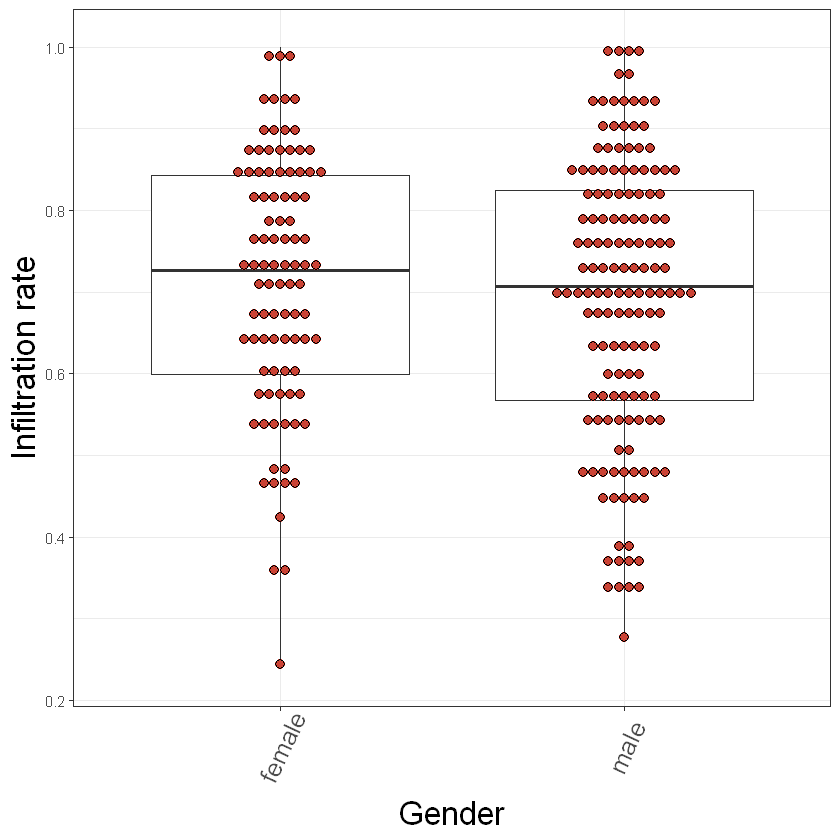

In [7]:
theme_set(theme_bw())

# plot
g <- ggplot(data, aes(gender, infil_rate))+ geom_boxplot() + 
  geom_dotplot(binaxis='y', 
               stackdir='center', 
               dotsize = .5, 
               fill="#CB4335") +
  theme(axis.text.x = element_text(angle=65, vjust=0.6,size=15),axis.title = element_text(size = 20)) + 
  labs(x="Gender",
       y="Infiltration rate")
plot(g)

`geom_smooth()` using formula 'y ~ x'



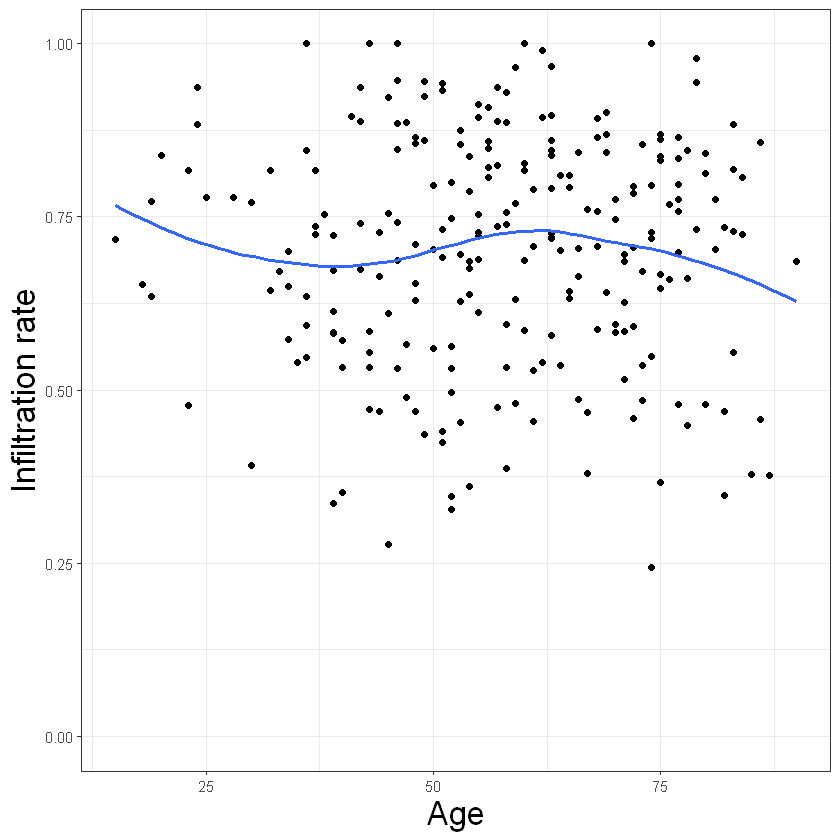

In [8]:
theme_set(theme_bw())
gg <- ggplot(data, aes(x=age, y=infil_rate)) + 
geom_point() + 
  geom_smooth(method="loess", se=F) + 
  ylim(c(0, 1)) +  
  theme(axis.title = element_text(size = 20))+
  labs(y="Infiltration rate", 
       x="Age")

plot(gg)

In [9]:
library(reshape)
data2=melt(data.frame(data[,5:30]), id="infil_rate")
str(data2)

Warning message:
"package 'reshape' was built under R version 3.6.3"


'data.frame':	6000 obs. of  3 variables:
 $ infil_rate: num  0.885 0.728 0.848 0.685 0.842 ...
 $ variable  : Factor w/ 25 levels "AKT1","AKT3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value     : num  0.976 -0.119 0.115 0.694 -1.513 ...


`geom_smooth()` using formula 'y ~ x'



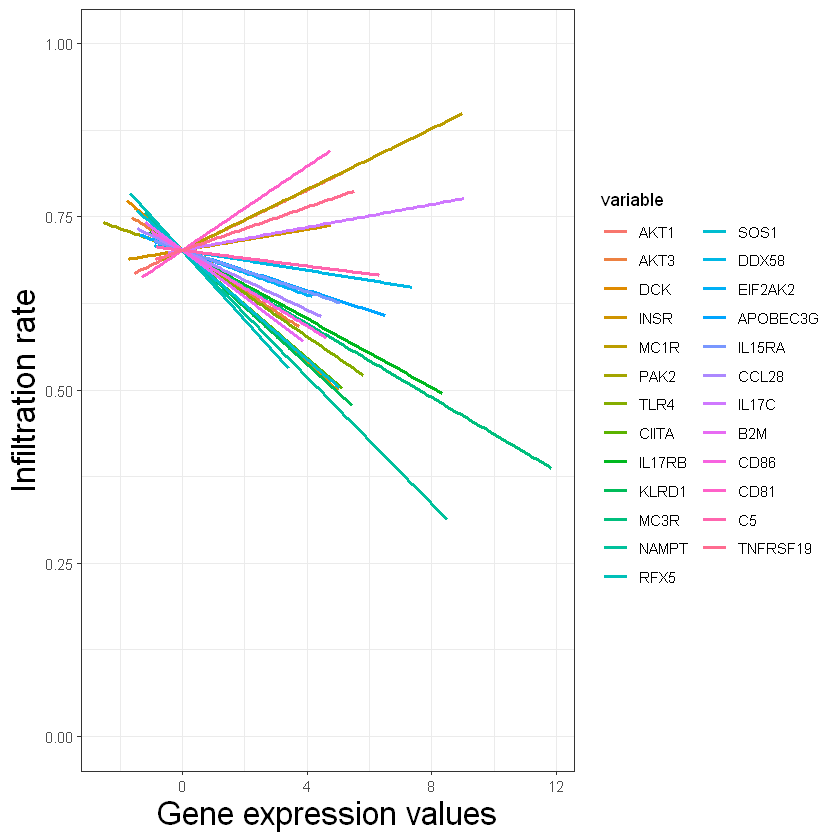

In [10]:
gg <- ggplot(data2, aes(x=value, y=infil_rate,color = variable,group=variable)) + 
  geom_smooth(method="lm", se=F) + 
  ylim(c(0, 1)) + 
  labs(y="Infiltration rate", 
       x="Gene expression values")+theme(axis.title = element_text(size = 20))

plot(gg)

`geom_smooth()` using formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.3011"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.1299"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 0.0048222"


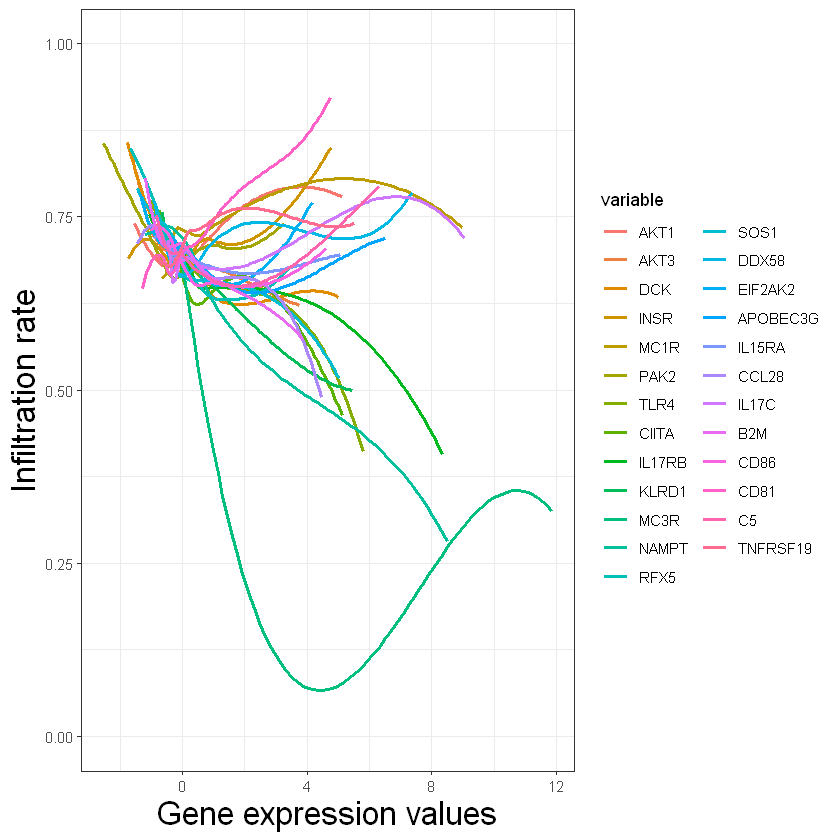

In [11]:
gg <- ggplot(data2, aes(x=value, y=infil_rate,color = variable,group=variable)) + 
  geom_smooth(method="loess", se=F) + 
  ylim(c(0, 1)) + 
  labs(y="Infiltration rate", 
       x="Gene expression values")+theme(axis.title = element_text(size = 20))

plot(gg)

### Correlation and multicollinearity

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"


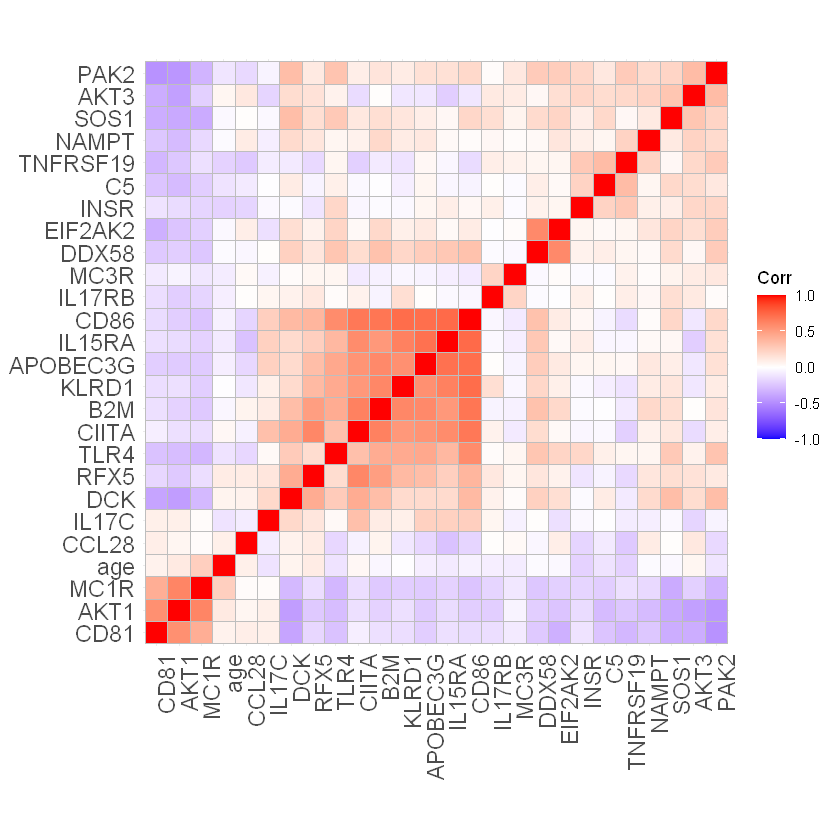

In [12]:
library(ggcorrplot)

# Correlation matrix
corr = cor(data.frame(data[,c(2,5:29)]))
# Plot
ggcorrplot(corr, hc.order = TRUE, 
           sig.level=0.05, p.mat = NULL, 
           insig = c("pch", "blank"), pch = 1, pch.col = "black", pch.cex =1,
           tl.cex = 14,tl.srt=90)

In [13]:
model1 <- lm(infil_rate ~., data = data[,c(1,2,5:30)])
car::vif(model1)

gender      age     AKT1     AKT3      DCK     INSR     MC1R     PAK2 
1.064538 1.230579 2.612786 1.716358 2.037113 1.336227 1.900630 1.697988 
    TLR4    CIITA   IL17RB    KLRD1     MC3R    NAMPT     RFX5     SOS1 
1.916146 3.469658 1.417103 3.033742 1.144627 1.300962 2.127809 1.449739 
   DDX58  EIF2AK2 APOBEC3G   IL15RA    CCL28    IL17C      B2M     CD86 
1.931870 1.897639 2.999269 3.446384 1.334444 1.363926 2.956038 5.862123 
    CD81       C5 TNFRSF19 
2.028991 1.375783 1.646352

### Count models

In [14]:
pm = glm(infiltration_count ~ . -tile_count-infil_rate,offset= log(tile_count), family = poisson(link = "log"), data = data)
summary(pm)


Call:
glm(formula = infiltration_count ~ . - tile_count - infil_rate, 
    family = poisson(link = "log"), data = data, offset = log(tile_count))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.5604  -1.4105   0.5106   1.9562   8.4395  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.4469095  0.0194584 -22.967  < 2e-16 ***
gendermale  -0.0359679  0.0091905  -3.914 9.09e-05 ***
age          0.0010250  0.0003084   3.323 0.000890 ***
AKT1        -0.0311534  0.0069024  -4.513 6.38e-06 ***
AKT3        -0.0303862  0.0056614  -5.367 7.99e-08 ***
DCK         -0.0147489  0.0060003  -2.458 0.013971 *  
INSR         0.0029850  0.0051340   0.581 0.560965    
MC1R        -0.0103208  0.0054722  -1.886 0.059289 .  
PAK2         0.0134622  0.0058051   2.319 0.020393 *  
TLR4        -0.0384123  0.0059420  -6.464 1.02e-10 ***
CIITA       -0.0765006  0.0090904  -8.416  < 2e-16 ***
IL17RB      -0.0107386  0.0050203  -2.139 0.032433 *  
KLRD1    

In [15]:
library(jtools)
summ(pm, vifs = TRUE)

MODEL INFO:
Observations: 240
Dependent Variable: infiltration_count
Type: Generalized linear model
  Family: poisson 
  Link function: log 

MODEL FIT:
χ2(27) = 1482.42, p = 0.00
Pseudo-R2 (Cragg-Uhler) = 1.00
Pseudo-R2 (McFadden) = 0.28
AIC = 3879.86, BIC = 3977.32 

Standard errors: MLE
-------------------------------------------------------
                     Est.   S.E.   z val.      p    VIF
----------------- ------- ------ -------- ------ ------
(Intercept)         -0.45   0.02   -22.97   0.00       
gendermale          -0.04   0.01    -3.91   0.00   1.13
age                  0.00   0.00     3.32   0.00   1.34
AKT1                -0.03   0.01    -4.51   0.00   2.70
AKT3                -0.03   0.01    -5.37   0.00   1.68
DCK                 -0.01   0.01    -2.46   0.01   2.17
INSR                 0.00   0.01     0.58   0.56   1.34
MC1R                -0.01   0.01    -1.89   0.06   1.88
PAK2                 0.01   0.01     2.32   0.02   1.76
TLR4                -0.04   0.01    -

In [16]:
pchisq(pm$deviance, df=pm$df.residual, lower.tail=FALSE)

[1] 6.515395e-313

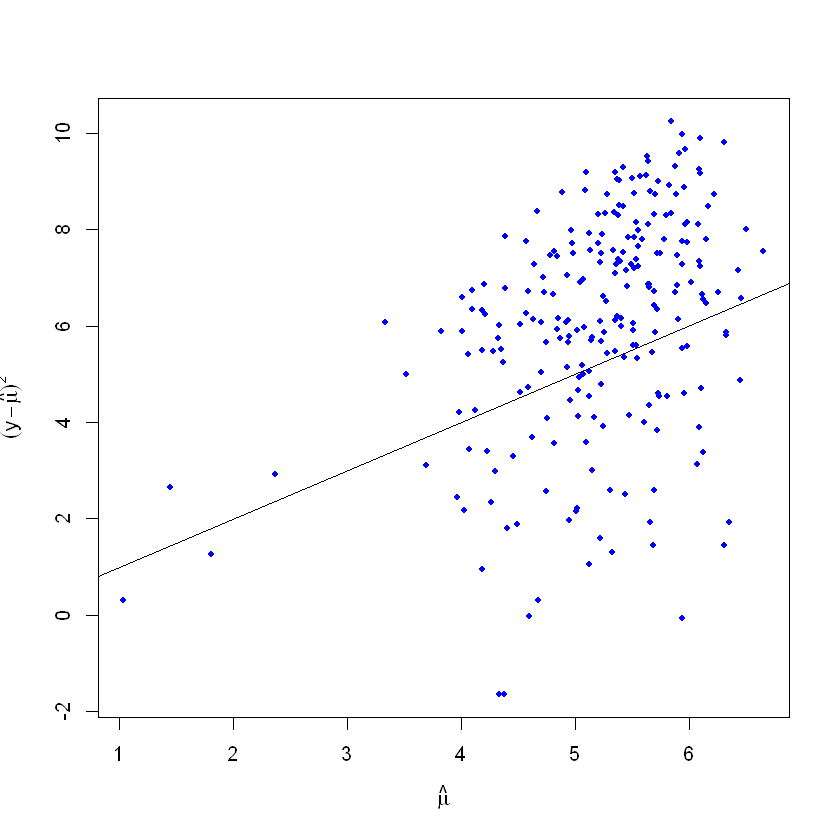

In [17]:

plot(log(fitted(pm)),log((data$infiltration_count-fitted(pm))^2),xlab=expression(hat(mu)),ylab=expression((y-hat(mu))^2),pch=20,col="blue")
abline(0,1) ## 'varianc = mean' line

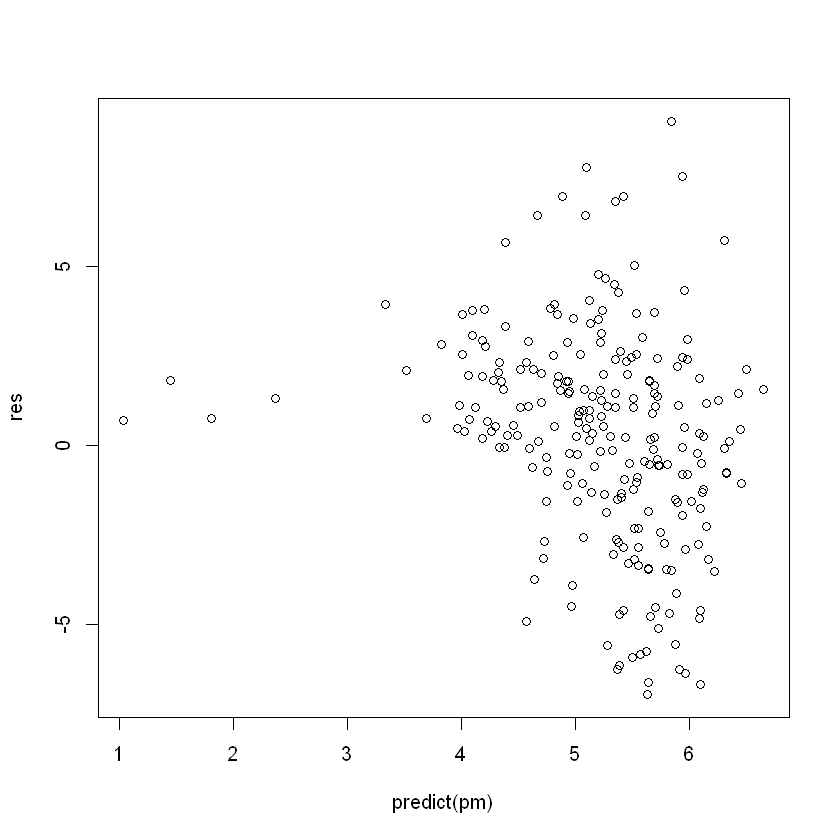

In [18]:
res <- residuals(pm, type="pearson")
plot(predict(pm), res)

In [19]:
library(AER)
dispersiontest(pm)

Warning message:
"package 'AER' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"



	Overdispersion test

data:  pm
z = 9.33, p-value < 2.2e-16
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  8.804337 


In [20]:
qpm = glm(infiltration_count ~ . -tile_count-infil_rate,offset= log(tile_count), family = quasipoisson(link = "log"), data = data)
summary(qpm)


Call:
glm(formula = infiltration_count ~ . - tile_count - infil_rate, 
    family = quasipoisson(link = "log"), data = data, offset = log(tile_count))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.5604  -1.4105   0.5106   1.9562   8.4395  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4469095  0.0616019  -7.255 7.46e-12 ***
gendermale  -0.0359679  0.0290956  -1.236  0.21775    
age          0.0010250  0.0009765   1.050  0.29507    
AKT1        -0.0311534  0.0218518  -1.426  0.15544    
AKT3        -0.0303862  0.0179230  -1.695  0.09147 .  
DCK         -0.0147489  0.0189960  -0.776  0.43837    
INSR         0.0029850  0.0162534   0.184  0.85446    
MC1R        -0.0103208  0.0173240  -0.596  0.55198    
PAK2         0.0134622  0.0183779   0.733  0.46466    
TLR4        -0.0384123  0.0188115  -2.042  0.04239 *  
CIITA       -0.0765006  0.0287786  -2.658  0.00845 ** 
IL17RB      -0.0107386  0.0158934  -0.676  0.49999    
KLRD

In [21]:
pchisq(qpm$deviance, df=qpm$df.residual, lower.tail=FALSE)

[1] 6.515395e-313

In [22]:
library(MASS)
nb_mod = glm.nb(infiltration_count ~ .-tile_count-infil_rate +offset(log(tile_count)),data = data)
summary(nb_mod)


Call:
glm.nb(formula = infiltration_count ~ . - tile_count - infil_rate + 
    offset(log(tile_count)), data = data, init.theta = 25.98425948, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8970  -0.5962   0.1153   0.6661   2.1316  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.4202487  0.0595855  -7.053 1.75e-12 ***
gendermale  -0.0361172  0.0289669  -1.247   0.2125    
age          0.0011466  0.0009522   1.204   0.2285    
AKT1        -0.0295311  0.0220854  -1.337   0.1812    
AKT3        -0.0338635  0.0179714  -1.884   0.0595 .  
DCK         -0.0165375  0.0195110  -0.848   0.3967    
INSR         0.0105184  0.0157951   0.666   0.5055    
MC1R        -0.0092644  0.0186917  -0.496   0.6201    
PAK2         0.0124106  0.0179780   0.690   0.4900    
TLR4        -0.0359654  0.0187752  -1.916   0.0554 .  
CIITA       -0.0585401  0.0258332  -2.266   0.0234 *  
IL17RB      -0.0121950  0.0162084  -0.752   0.4518

In [23]:
summ(nb_mod, vifs = TRUE)

Error in glm.control(...) : 参数没有用(offset = .offset)


Warning message:
"Something went wrong when calculating the pseudo R-squared. Returning NA
instead."


MODEL INFO:
Observations: 240
Dependent Variable: infiltration_count
Type: Generalized linear model
  Family: Negative Binomial(25.9843) 
  Link function: log 

MODEL FIT:
χ2(NA) = NA, p = NA
Pseudo-R2 (Cragg-Uhler) = NA
Pseudo-R2 (McFadden) = NA
AIC = 2511.66, BIC = 2612.60 

Standard errors: MLE
-------------------------------------------------------
                     Est.   S.E.   z val.      p    VIF
----------------- ------- ------ -------- ------ ------
(Intercept)         -0.42   0.06    -7.05   0.00       
gendermale          -0.04   0.03    -1.25   0.21   1.07
age                  0.00   0.00     1.20   0.23   1.25
AKT1                -0.03   0.02    -1.34   0.18   2.62
AKT3                -0.03   0.02    -1.88   0.06   1.72
DCK                 -0.02   0.02    -0.85   0.40   2.03
INSR                 0.01   0.02     0.67   0.51   1.32
MC1R                -0.01   0.02    -0.50   0.62   1.89
PAK2                 0.01   0.02     0.69   0.49   1.71
TLR4                -0.04   0

In [24]:
pchisq(nb_mod$deviance, df=nb_mod$df.residual, lower.tail=FALSE)

[1] 0.06866604

In [25]:
stepAIC(nb_mod,direction = 'both',trace = F)


Call:  glm.nb(formula = infiltration_count ~ AKT3 + TLR4 + CIITA + KLRD1 + 
    MC3R + NAMPT + SOS1 + CD86 + TNFRSF19 + offset(log(tile_count)), 
    data = data, init.theta = 24.03979379, link = log)

Coefficients:
(Intercept)         AKT3         TLR4        CIITA        KLRD1         MC3R  
   -0.37408     -0.03398     -0.02859     -0.06314     -0.05820     -0.04301  
      NAMPT         SOS1         CD86     TNFRSF19  
   -0.06205     -0.03090      0.06899      0.04369  

Degrees of Freedom: 239 Total (i.e. Null);  230 Residual
Null Deviance:	    322.9 
Residual Deviance: 242 	AIC: 2490

In [32]:
library(MASS)
new_nb_mod = glm.nb(infiltration_count ~ age+gender+AKT3 + TLR4 + CIITA + KLRD1 + 
    MC3R + NAMPT + SOS1 + CD86 + TNFRSF19 +offset(log(tile_count)),data = data)
summary(new_nb_mod)


Call:
glm.nb(formula = infiltration_count ~ age + gender + AKT3 + TLR4 + 
    CIITA + KLRD1 + MC3R + NAMPT + SOS1 + CD86 + TNFRSF19 + offset(log(tile_count)), 
    data = data, init.theta = 24.25137094, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.97293  -0.66746   0.08712   0.67594   2.02938  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.3917982  0.0584098  -6.708 1.98e-11 ***
age          0.0006320  0.0009181   0.688  0.49126    
gendermale  -0.0311734  0.0290952  -1.071  0.28398    
AKT3        -0.0346437  0.0158017  -2.192  0.02835 *  
TLR4        -0.0275698  0.0181612  -1.518  0.12900    
CIITA       -0.0640071  0.0200701  -3.189  0.00143 ** 
KLRD1       -0.0598488  0.0210670  -2.841  0.00450 ** 
MC3R        -0.0412146  0.0139771  -2.949  0.00319 ** 
NAMPT       -0.0633004  0.0149887  -4.223 2.41e-05 ***
SOS1        -0.0314811  0.0153788  -2.047  0.04065 *  
CD86         0.0713961  0.0273005   2.61

In [27]:
pchisq(new_nb_mod$deviance, df=new_nb_mod$df.residual, lower.tail=FALSE)

[1] 0.2813673

In [28]:
pchisq(2 * (logLik(nb_mod) - logLik(new_nb_mod)), df = 18, lower.tail = FALSE)

'log Lik.' 0.6743879 (df=29)

In [30]:
renb_mod = glm.nb(infiltration_count ~age+gender +offset(log(tile_count)),data = data)
summary(renb_mod)


Call:
glm.nb(formula = infiltration_count ~ age + gender + offset(log(tile_count)), 
    data = data, init.theta = 17.31719959, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6296  -0.6846   0.1189   0.7034   1.5773  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.477e-01  6.524e-02  -5.330 9.83e-08 ***
age          2.628e-06  1.023e-03   0.003    0.998    
gendermale  -3.040e-02  3.358e-02  -0.905    0.365    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(17.3172) family taken to be 1)

    Null deviance: 240.78  on 239  degrees of freedom
Residual deviance: 239.97  on 237  degrees of freedom
AIC: 2544.6

Number of Fisher Scoring iterations: 1


              Theta:  17.32 
          Std. Err.:  1.72 

 2 x log-likelihood:  -2536.637 

In [31]:
pchisq(2 * (logLik(nb_mod) - logLik(renb_mod)), df = 25, lower.tail = FALSE)

'log Lik.' 3.870431e-08 (df=29)

### diagnostics

In [34]:
anova(new_nb_mod, nb_mod)

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<fct>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>
AKT3 + TLR4 + CIITA + KLRD1 + MC3R + NAMPT + SOS1 + CD86 + TNFRSF19 + offset(log(tile_count)),24.03979,230,-2468.480,,NA,NA,NA
(gender + age + tile_count + AKT1 + AKT3 + DCK + INSR + MC1R + PAK2 + TLR4 + CIITA + IL17RB + KLRD1 + MC3R + NAMPT + RFX5 + SOS1 + DDX58 + EIF2AK2 + APOBEC3G + IL15RA + CCL28 + IL17C + B2M + CD86 + CD81 + C5 + TNFRSF19 + infil_rate) - tile_count - infil_rate + offset(log(tile_count)),25.98426,212,-2453.661,1 vs 2,18,14.81853,0.6743879


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
71,-0.7702433,0.62963487,0.10360035
72,-2.3331269,0.33371811,0.23037424
127,-2.9285701,0.01743244,0.01021794
234,-2.9167926,0.07551055,0.04821467


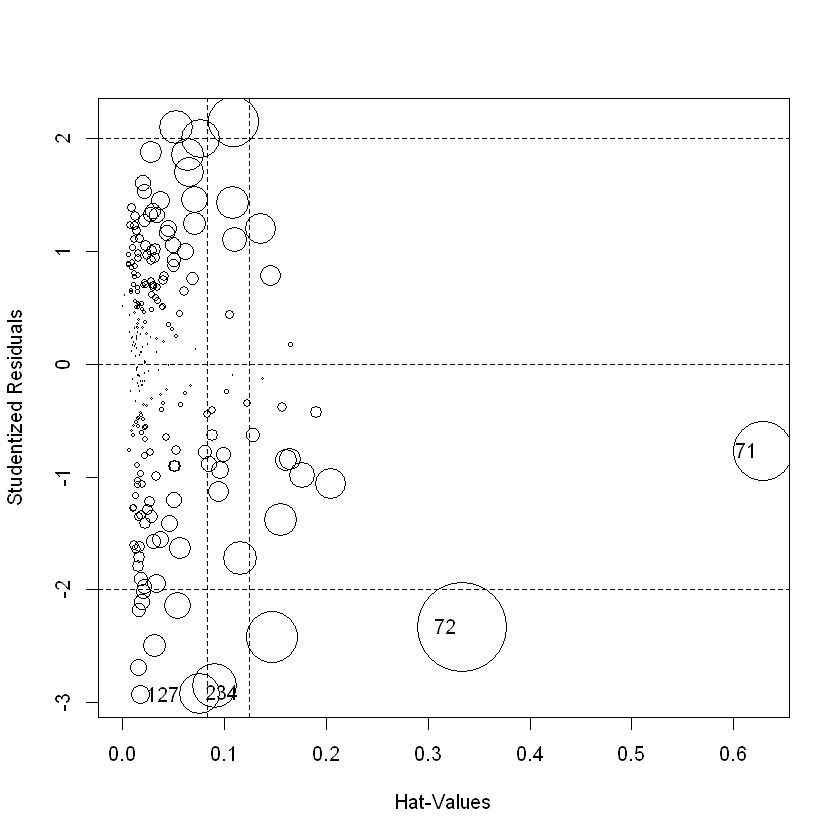

In [33]:
library(car)
influencePlot(new_nb_mod)


In [ ]:
res <- residuals(new_nb_mod, type="deviance")
plot(exp(predict(new_nb_mod)), res)
abline(h=0, lty=2)
qqnorm(res)
qqline(res)
library(statmod)
qqnorm(qresid(new_nb_mod));qqline(qresid(new_nb_mod))